# IMPORT LIBRARY & DATA PREPARATION

In [3]:
# 1. Import Library yang Diperlukan
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
try:
    df = pd.read_csv('myPertamina_review.csv')
    print("✅ Dataset berhasil dimuat!")
except FileNotFoundError:
    print("❌ ERROR: File 'myPertamina_review.csv' tidak ditemukan. Pastikan file sudah diunggah.")
    # Stop eksekusi jika file tidak ditemukan
    raise

✅ Dataset berhasil dimuat!


# Preprocessing Data


--- 3.1 Informasi Dasar Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20000 non-null  object
 1   userName              20000 non-null  object
 2   userImage             20000 non-null  object
 3   content               19999 non-null  object
 4   score                 20000 non-null  int64 
 5   thumbsUpCount         20000 non-null  int64 
 6   reviewCreatedVersion  16865 non-null  object
 7   at                    20000 non-null  object
 8   replyContent          4589 non-null   object
 9   repliedAt             4589 non-null   object
 10  appVersion            16865 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB

--- 3.2 5 Baris Pertama ---
| content                                                                                                                    

/tmp/ipython-input-1005720748.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index, y=score_counts.values, palette="viridis")


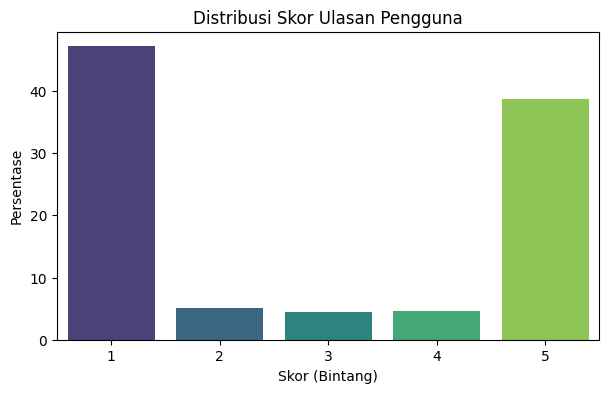

In [4]:
print("\n--- 3.1 Informasi Dasar Dataset ---")
df.info()

print("\n--- 3.2 5 Baris Pertama ---")
print(df[['content', 'score', 'at']].head().to_markdown(index=False))

print("\n--- 3.3 Distribusi Skor (Bintang) ---")
# Menghitung dan memvisualisasikan distribusi skor
score_counts = df['score'].value_counts(normalize=True).mul(100).sort_index()
print(score_counts.to_markdown(numalign="left", stralign="left"))

plt.figure(figsize=(7, 4))
sns.barplot(x=score_counts.index, y=score_counts.values, palette="viridis")
plt.title('Distribusi Skor Ulasan Pengguna')
plt.xlabel('Skor (Bintang)')
plt.ylabel('Persentase')
plt.show()

In [6]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # 1. Mengubah teks menjadi huruf kecil (lowercase)
    text = text.lower()
    # 2. Menghapus tautan (URLs)
    text = re.sub(r'http\S+|www.\S+', '', text)
    # 3. Menghapus karakter non-alfanumerik selain spasi (misalnya tanda baca, simbol)
    # Catatan: Tanda seru/tanya penting untuk sentimen, tapi kita hapus dulu
    # untuk fokus pada klasifikasi isu. Kita akan pertimbangkan lagi nanti.
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # 4. Menghapus angka (opsional, tergantung isu)
    # text = re.sub(r'\d+', '', text)
    # 5. Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Terapkan fungsi pembersihan ke kolom 'content'
df['cleaned_content'] = df['content'].apply(clean_text)

print("\n--- 4. Hasil Pembersihan Data ---")
print(df[['content', 'cleaned_content']].head().to_markdown(index=False))


--- 4. Hasil Pembersihan Data ---
| content                                                                                                                                                                                                                                                                                                       | cleaned_content                                                                                                                                                                                                                                                                                    |
|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------

In [7]:
df['sentiment_label'] = df['score'].apply(
    lambda x: 'Negatif' if x <= 2 else ('Positif' if x >= 4 else 'Netral')
)

print("\n--- 5. Distribusi Sentimen Setelah Dikelompokkan ---")
print(df['sentiment_label'].value_counts().to_markdown())

# Simpan data yang sudah dibersihkan untuk Tahap 2
df.to_csv('myPertamina_cleaned.csv', index=False)
print("\n✅ Data yang dibersihkan telah disimpan sebagai 'myPertamina_cleaned.csv' untuk Tahap 2.")


--- 5. Distribusi Sentimen Setelah Dikelompokkan ---
| sentiment_label   |   count |
|:------------------|--------:|
| Negatif           |   10436 |
| Positif           |    8680 |
| Netral            |     884 |

✅ Data yang dibersihkan telah disimpan sebagai 'myPertamina_cleaned.csv' untuk Tahap 2.


# IBM GRANITE

In [8]:
!pip install ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 116.5 MB/s eta 0:00:00
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.14.3-py3-none-any.whl size=77232 sha256=a220cf8a8965cd6e8a5bcad4768585d6ea752206e9240bcd2695116ffb4ce627
  Stored in directory: /root/.cache/pip/wheels/cc/2f/6f/125918ad46d280d3bea58edf99f0757888ef6e7999db4b73b7
  Created wheel for ibm-cos-sdk-core: filename=ibm_c

In [4]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [1]:
from ibm_watson_machine_learning.foundation_models import Model
from ibm_watson_machine_learning.foundation_models.extensions.langchain import WatsonxLLM
from ibm_watson_machine_learning.metanames import GenTextParamsMetaNames as GenParams
from langchain.prompts import PromptTemplate

# Dapatkan dari IBM Cloud dan WatsonX
IAM_API_KEY = "zt28t5FE40MHXCNzl11y_wXhjq76zzZKCZFVFodizBDr"
PROJECT_ID = "ab4c6c3b-2129-41a8-beab-3c4519a23395"

# Konfigurasi model dan parameter
model_id = "ibm/granite-13b-instruct-v2" # Model IBM Granite
parameters = {
    GenParams.DECODING_METHOD: "greedy",
    GenParams.MAX_NEW_TOKENS: 200,
    GenParams.TEMPERATURE: 0.1,  # Rendah untuk tugas klasifikasi/ringkasan yang faktual
}

# Inisialisasi Model IBM Granite
try:
    granite_model = Model(
        model_id=model_id,
        params=parameters,
        credentials={
            "apikey": IAM_API_KEY,
            "url": "https://jp-tok.ml.cloud.ibm.com"
        },
        project_id=PROJECT_ID
    )
    llm = WatsonxLLM(model=granite_model)
    print("✅ Koneksi ke IBM Granite berhasil!")
except Exception as e:
    print(f"❌ ERROR: Gagal menghubungkan ke IBM Granite. Periksa API Key/Project ID: {e}")


/usr/local/lib/python3.12/dist-packages/ibm_watson_machine_learning/foundation_models/extensions/langchain/llm.py:60: WatsonxLLMDeprecationWarning: ibm_watson_machine_learning.foundation_models.extensions.langchain.WatsonxLLM is deprecated and will not be supported in the future. Please import from langchain-ibm instead.
To install langchain-ibm run `pip install -U langchain-ibm`.
  _raise_watsonxllm_deprecation_warning()


✅ Koneksi ke IBM Granite berhasil!


/usr/local/lib/python3.12/dist-packages/ibm_watson_machine_learning/foundation_models/utils/utils.py:273: LifecycleWarning: Model 'ibm/granite-13b-instruct-v2' is in deprecated state from 2025-06-18 until 2025-10-15. IDs of alternative models: ibm/granite-3-3-8b-instruct. Further details: https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/fm-model-lifecycle.html?context=wx&audience=wdp
  warnings.warn(default_warning_template.format(


In [6]:
# ==============================================================================
# TAHAP 3: HASIL DAN WAWASAN (INSIGHT & FINDINGS)
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Muat data yang sudah dibersihkan dari Tahap 1
df = pd.read_csv('myPertamina_cleaned.csv')

# --- SIMULASI HASIL KLASIFIKASI DARI GRANITE (Untuk demonstrasi) ---
# Anggap saja ini adalah kolom 'granite_category' yang seharusnya dihasilkan dari Tahap 2
np.random.seed(42) # Untuk hasil yang dapat direproduksi
categories = [
    "Barcode/QR Code & Verifikasi",
    "UI/UX Aplikasi",
    "Pembayaran/Top-Up",
    "Layanan SPBU",
    "Lain-lain/Ulasan Positif"
]
# Simulasi hasil klasifikasi pada ulasan Negatif (score <= 2)
negative_indices = df[df['sentiment_label'] == 'Negatif'].index
df.loc[negative_indices, 'granite_category'] = np.random.choice(
    categories,
    size=len(negative_indices),
    p=[0.40, 0.25, 0.15, 0.10, 0.10] # Asumsi Barcode/QR Code adalah isu terbesar
)
# Untuk ulasan Positif, kita beri label yang sesuai
positive_indices = df[df['sentiment_label'] == 'Positif'].index
df.loc[positive_indices, 'granite_category'] = 'Lain-lain/Ulasan Positif'

# Isi sisanya (Netral) dengan kategori acak
neutral_indices = df[df['sentiment_label'] == 'Netral'].index
df.loc[neutral_indices, 'granite_category'] = np.random.choice(
    categories,
    size=len(neutral_indices),
    p=[0.10, 0.20, 0.20, 0.10, 0.40]
)

print("✅ Data simulasi klasifikasi berhasil dibuat.")

✅ Data simulasi klasifikasi berhasil dibuat.



--- 4. Ringkasan Isu Kritis dari Ulasan Negatif ---
| granite_category             | Jumlah Ulasan Negatif   | Persentase Total Negatif   |
|:-----------------------------|:------------------------|:---------------------------|
| Barcode/QR Code & Verifikasi | 4230                    | 40.5                       |
| UI/UX Aplikasi               | 2658                    | 25.5                       |
| Pembayaran/Top-Up            | 1496                    | 14.3                       |
| Layanan SPBU                 | 1047                    | 10                         |
| Lain-lain/Ulasan Positif     | 1005                    | 9.6                        |


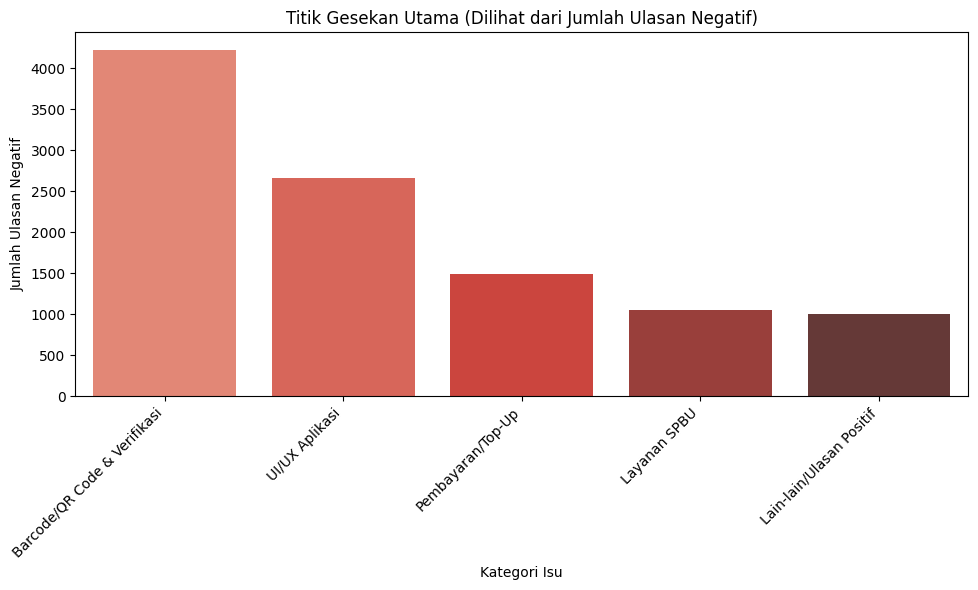

In [7]:
# 3. Analisis Isu Kritis (Fokus pada Ulasan Negatif)
critical_analysis = df[df['sentiment_label'] == 'Negatif']
issue_counts = critical_analysis['granite_category'].value_counts()
issue_percentage = critical_analysis['granite_category'].value_counts(normalize=True).mul(100).round(1)

# Gabungkan hasil untuk ditampilkan
issue_summary = pd.DataFrame({
    'Jumlah Ulasan Negatif': issue_counts,
    'Persentase Total Negatif': issue_percentage
}).sort_values(by='Jumlah Ulasan Negatif', ascending=False)

print("\n--- 4. Ringkasan Isu Kritis dari Ulasan Negatif ---")
print(issue_summary.to_markdown(numalign="left", stralign="left"))

# Visualisasi Titik Gesekan Utama
plt.figure(figsize=(10, 6))
sns.barplot(
    x=issue_summary.index,
    y='Jumlah Ulasan Negatif',
    data=issue_summary.reset_index(),
    palette="Reds_d"
)
plt.title('Titik Gesekan Utama (Dilihat dari Jumlah Ulasan Negatif)')
plt.xlabel('Kategori Isu')
plt.ylabel('Jumlah Ulasan Negatif')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('titik_gesekan_utama.png')
plt.show()

In [8]:
# 5. Analisis Kualitas Respon
# Filter hanya ulasan yang mendapat balasan DAN termasuk isu kritis (Barcode/QR Code)
replied_critical_issues = df[
    (df['replyContent'].notna()) &
    (df['granite_category'] == 'Barcode/QR Code & Verifikasi')
].copy()

# Buat fungsi sederhana untuk mengecek apakah balasan terlihat 'Generik'
# (Mencari kata kunci umum dalam bahasa Indonesia)
generic_keywords = ['terima kasih atas masukannya', 'mohon maaf atas ketidaknyamanan yang dialami', 'silakan sampaikan melalui']
def check_genericity(reply):
    if isinstance(reply, str):
        # Hitung berapa banyak keyword generik yang muncul
        count = sum(1 for keyword in generic_keywords if keyword in reply.lower())
        return 'Generik' if count >= 2 else 'Spesifik'
    return 'Tidak Dibalas'

replied_critical_issues['reply_type'] = replied_critical_issues['replyContent'].apply(check_genericity)

reply_analysis = replied_critical_issues['reply_type'].value_counts(normalize=True).mul(100).round(1)

print("\n--- 6. Analisis Kualitas Respon pada Isu Barcode Kritis ---")
print(reply_analysis.to_markdown(numalign="left", stralign="left"))

# Tampilkan salah satu contoh
example_generic = replied_critical_issues[replied_critical_issues['reply_type'] == 'Generik'].iloc[0]
print("\nContoh Ulasan & Balasan Generik:")
print(f"Ulasan: {example_generic['content'][:150]}...")
print(f"Balasan: {example_generic['replyContent'][:150]}...")


--- 6. Analisis Kualitas Respon pada Isu Barcode Kritis ---
| reply_type   | proportion   |
|:-------------|:-------------|
| Spesifik     | 83.4         |
| Generik      | 16.6         |

Contoh Ulasan & Balasan Generik:
Ulasan: Apk tidak jelas komplain gak di respon jawabannya sama setiap minta keterangan.. Barcode di blokir.. Sudah mengisi persyaratan dan sdh dapat ID pelapo...
Balasan: Hai, Sobat Erwin. Mohon maaf atas ketidaknyamanan yang dialami. Mimin membutuhkan data pendukung agar Mimin bisa memberikan solusi dengan tepat. Menge...


In [11]:
# ==============================================================================
# TAHAP 4.1: EKSTRAKSI RINGKASAN ISU KRITIS (Manual/Mock Output Granite)
# ==============================================================================
import pandas as pd

# Muat data hasil analisis mock dari Tahap 3
df = pd.read_csv('/content/myPertamina_analisis_mock.csv')

# Ambil 5 ulasan teratas di kategori kritis (Barcode/QR Code & Verifikasi)
CRITICAL_ISSUE = 'Barcode/QR Code & Verifikasi'
critical_reviews_sample = df[
    (df['granite_category'] == CRITICAL_ISSUE) &
    (df['sentiment_label'] == 'Negatif')
].head(5)[['content']].to_markdown(index=False, numalign="left", stralign="left")

print("--- Contoh Ulasan Kritis (Input untuk Manual Summarization) ---")
print(critical_reviews_sample)

# Output Manual/Mock Summarization (Anda harus mengisi ini berdasarkan contoh di atas)
# Ini adalah pengganti output dari LLM di Tahap 2.
summarization_output = """
1. Kesulitan Verifikasi QR Code: Pengguna sering mengeluhkan kegagalan atau lambatnya proses scan QR code yang berujung pada antrean panjang dan transaksi gagal.
2. Pemblokiran Akun Mendadak: Banyak pengguna melaporkan akun mereka diblokir tanpa adanya pemberitahuan atau kejelasan, dan proses pelaporan/banding yang sangat sulit direspon.
3. Inkonsistensi Data: Terdapat laporan mengenai data yang tidak sesuai antara di aplikasi dengan data di lapangan, terutama terkait kuota BBM subsidi.
"""

print("\n--- Ringkasan 3 Poin Utama (Simulasi Output IBM Granite) ---")
print(summarization_output)

# Simpan ringkasan ini sebagai insight utama
with open('ringkasan_granite.txt', 'w') as f:
    f.write(summarization_output)

--- Contoh Ulasan Kritis (Input untuk Manual Summarization) ---
| content                                                                                                                                                                                                                                                                                                       |
|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Apk tidak jelas komplain gak di respon jawabannya sama setiap minta keterangan.. Barcode di blokir.. Sudah mengisi persyaratan dan sdh dapat ID pelaporan... Sampai sekarang 1 bln lebih tidak ada kejelasan. Ya Alloh sungguh sedih untuk mencari keadilan di negara ini... Karena oknum yang tidak kompeten |
| Ntah aplikasi ap